# Data Wrangling Project

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [3]:
games_df=pd.read_csv('college_football_data_raw.csv',encoding='utf-8')
display(games_df.head())

,Year,Team,Conference,Wins,Losses,Bowl Game,Average Attendance
0,2005,Tulane,Conference USA,2,9,False,2894.090909
1,2005,Idaho State,Big Sky,5,6,False,59519.000000
2,2005,Howard,MEAC,3,6,False,NaN
3,2005,Stony Brook,NEC,6,5,False,NaN
4,2005,Kansas State,Big 12,5,6,False,0.000000


In [4]:
#Load in csv file with revenue and expense data
rev_exp_df=pd.read_csv('Revenues_Expenses_Data.csv',encoding='utf-8')
rev_exp_df.rename(columns={'team':'Team','year':'Year'},inplace=True)
display(rev_exp_df.head())

,Team,Year,total_revenue,total_expense
0,Air Force,2005,15481081.0,14330645.0
1,Air Force,2006,27085224.0,26606845.0
2,Air Force,2007,29024404.0,28064038.0
3,Air Force,2008,30604249.0,31174646.0
4,Air Force,2009,33616930.0,34945674.0


In [5]:
#Horizontally join the two dfs based on team column
outer_join=pd.merge(games_df,rev_exp_df,on=['Team','Year'],how='outer')
#Display to inspect that integration was successful
display(outer_join)
outer_join.to_csv("cfb_join_raw.csv", index=False)

,Year,Team,Conference,Wins,Losses,Bowl Game,Average Attendance,total_revenue,total_expense
0,2007,Abilene Christian,FCS Independents,1.0,0.0,False,NaN,NaN,NaN
1,2013,Abilene Christian,FCS Independents,6.0,5.0,False,15628.0,NaN,NaN
2,2014,Abilene Christian,Southland,5.0,6.0,False,13730.0,NaN,NaN
3,2015,Abilene Christian,Southland,3.0,7.0,False,32547.0,NaN,NaN
4,2016,Abilene Christian,Southland,2.0,9.0,False,34128.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6189,2019,Youngstown State,MVFC,6.0,6.0,False,NaN,NaN,NaN
6190,2020,Youngstown State,MVFC,1.0,6.0,False,NaN,NaN,NaN
6191,2021,Youngstown State,MVFC,3.0,7.0,False,70103.0,NaN,NaN
6192,2022,Youngstown State,MVFC,7.0,4.0,False,59308.0,NaN,NaN


In [6]:
#Clean/Filter the data so that it only contains teams in our analysis
#make list for teams in our analysis
teams = [ "Air Force", "Akron", "Alabama", "App State", "Arizona", "Arizona State", 
         "Arkansas", "Arkansas State", "Army", "Auburn", "Ball State", "Boise State", 
         "Bowling Green", "Buffalo", "California", "Central Michigan", "Charlotte", 
         "Cincinnati", "Clemson", "Coastal Carolina", "Colorado", "Colorado State", 
         "East Carolina", "Eastern Michigan", "Florida", "Florida Atlantic", 
         "Florida International", "Florida State", "Fresno State", "Georgia", 
         "Georgia Southern", "Georgia State", "Georgia Tech", "Hawai'i", "Houston", 
         "Idaho", "Illinois", "Indiana", "Iowa", "Iowa State", "Kansas", "Kansas State", 
         "Kent State", "Kentucky", "Louisiana", "Louisiana Tech", "Louisville", "LSU", "Marshall", 
         "Maryland", "Massachusetts", "Memphis", "Miami (OH)", "Michigan", "Michigan State", 
         "Middle Tennessee", "Minnesota", "Mississippi State", "Missouri", "Navy", "NC State", 
         "Nebraska", "Nevada", "New Mexico", "New Mexico State", "North Carolina", "North Texas", 
         "Northern Illinois", "Ohio", "Ohio State", "Oklahoma", "Oklahoma State", "Old Dominion", 
         "Ole Miss", "Oregon", "Oregon State", "Penn State", "Pittsburgh", "Purdue", "Rutgers", 
         "San Diego State", "San José State", "South Alabama", "South Carolina", "South Florida", 
         "Southern Miss", "Temple", "Tennessee", "Texas", "Texas A&M", "Texas State", "Texas Tech", 
         "Toledo", "Troy", "UAB", "UCF", "UCLA", "UConn", "UL Monroe", "UNLV", "Utah", "Utah State", 
         "UTEP", "UTSA", "Virginia", "Virginia Tech", "Washington", "Washington State", "West Virginia",
         "Western Kentucky", "Western Michigan", "Wisconsin", "Wyoming" ] 

#Filter data frame so it only contains teams within teams list
df_filtered=outer_join[outer_join['Team'].isin(teams)]
#Inspect filtered dataframe to insure filter worked correctly
display(df_filtered)

,Year,Team,Conference,Wins,Losses,Bowl Game,Average Attendance,total_revenue,total_expense
18,2005,Air Force,Mountain West,4.0,7.0,False,0.000000,15481081.0,14330645.0
19,2006,Air Force,Mountain West,4.0,8.0,False,36962.750000,27085224.0,26606845.0
20,2007,Air Force,Mountain West,9.0,4.0,True,39537.666667,29024404.0,28064038.0
21,2008,Air Force,Mountain West,8.0,5.0,True,32452.666667,30604249.0,31174646.0
22,2009,Air Force,Mountain West,8.0,5.0,True,0.000000,33616930.0,34945674.0
...,...,...,...,...,...,...,...,...,...
6152,2019,Wyoming,Mountain West,8.0,5.0,True,22821.333333,47046852.0,48154020.0
6153,2020,Wyoming,Mountain West,2.0,4.0,False,1618.333333,44543915.0,45057916.0
6154,2021,Wyoming,Mountain West,7.0,6.0,True,20624.583333,42487812.0,40117057.0
6155,2022,Wyoming,Mountain West,7.0,6.0,True,25854.500000,50255884.0,47146999.0


In [7]:
df_filtered.reset_index(drop=True, inplace=True)
display(df_filtered)

,Year,Team,Conference,Wins,Losses,Bowl Game,Average Attendance,total_revenue,total_expense
0,2005,Air Force,Mountain West,4.0,7.0,False,0.000000,15481081.0,14330645.0
1,2006,Air Force,Mountain West,4.0,8.0,False,36962.750000,27085224.0,26606845.0
2,2007,Air Force,Mountain West,9.0,4.0,True,39537.666667,29024404.0,28064038.0
3,2008,Air Force,Mountain West,8.0,5.0,True,32452.666667,30604249.0,31174646.0
4,2009,Air Force,Mountain West,8.0,5.0,True,0.000000,33616930.0,34945674.0
...,...,...,...,...,...,...,...,...,...
2142,2019,Wyoming,Mountain West,8.0,5.0,True,22821.333333,47046852.0,48154020.0
2143,2020,Wyoming,Mountain West,2.0,4.0,False,1618.333333,44543915.0,45057916.0
2144,2021,Wyoming,Mountain West,7.0,6.0,True,20624.583333,42487812.0,40117057.0
2145,2022,Wyoming,Mountain West,7.0,6.0,True,25854.500000,50255884.0,47146999.0


In [8]:
df_filtered = df_filtered.copy()  # Create a deep copy
df_filtered.rename(columns={
    'Year': 'year',
    'Team': 'team',
    'Conference': 'conference',
    'Wins': 'wins',
    'Losses': 'losses',
    'Bowl Game': 'bowl_game',
    'Average Attendance': 'average_attendance'
}, inplace=True)
display(df_filtered)
df_filtered.to_csv("cfb_data_clean.csv", index=False)

,year,team,conference,wins,losses,bowl_game,average_attendance,total_revenue,total_expense
0,2005,Air Force,Mountain West,4.0,7.0,False,0.000000,15481081.0,14330645.0
1,2006,Air Force,Mountain West,4.0,8.0,False,36962.750000,27085224.0,26606845.0
2,2007,Air Force,Mountain West,9.0,4.0,True,39537.666667,29024404.0,28064038.0
3,2008,Air Force,Mountain West,8.0,5.0,True,32452.666667,30604249.0,31174646.0
4,2009,Air Force,Mountain West,8.0,5.0,True,0.000000,33616930.0,34945674.0
...,...,...,...,...,...,...,...,...,...
2142,2019,Wyoming,Mountain West,8.0,5.0,True,22821.333333,47046852.0,48154020.0
2143,2020,Wyoming,Mountain West,2.0,4.0,False,1618.333333,44543915.0,45057916.0
2144,2021,Wyoming,Mountain West,7.0,6.0,True,20624.583333,42487812.0,40117057.0
2145,2022,Wyoming,Mountain West,7.0,6.0,True,25854.500000,50255884.0,47146999.0


In [9]:
count_unique_teams = df_filtered['team'].nunique()
print(f"Count of unique teams: {count_unique_teams}")

Count of unique teams: 113


Correlation Coefficient: 0.2698184400362065
P-value: 3.9226676528763083e-35


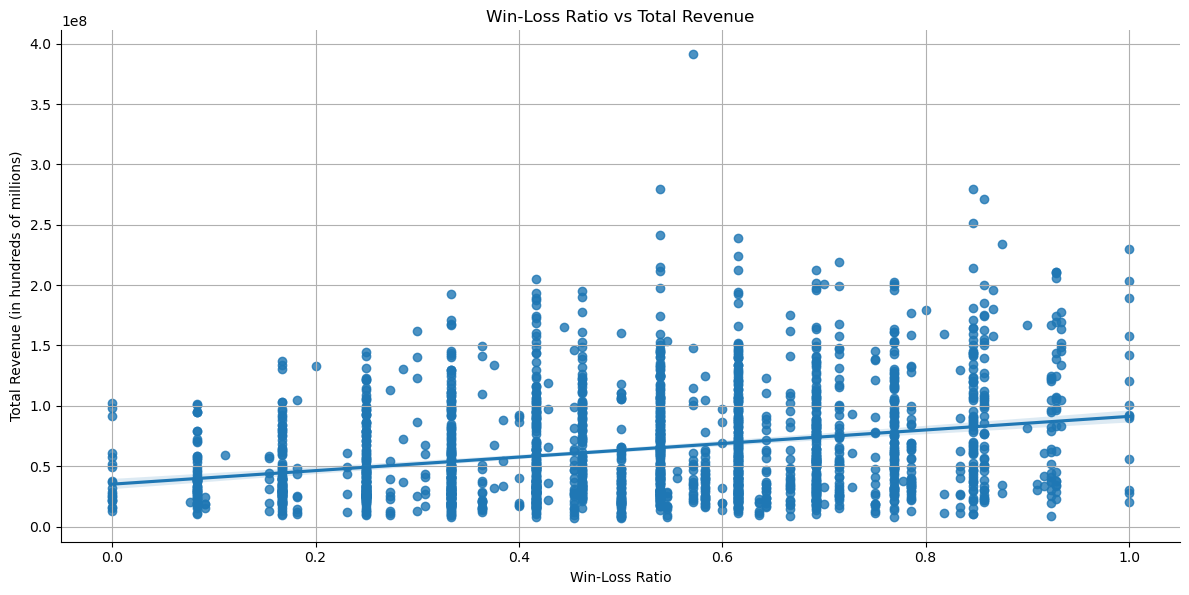

In [31]:
# Question 1: 
# Is there a correlation between a college football team's win-loss record and the total athletic revenue generated by its university?

# Calculate the win-loss ratio
df_filtered['win_loss_ratio'] = df_filtered['wins'] / (df_filtered['wins'] + df_filtered['losses'])

# Check for missing or invalid values
df_filtered = df_filtered.dropna(subset=['win_loss_ratio', 'total_revenue'])

# Calculate the correlation
correlation, p_value = pearsonr(df_filtered['win_loss_ratio'], df_filtered['total_revenue'])

# Print the correlation coefficient and p-value
print(f"Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")


# Optional: Linear regression line
sns.lmplot(data=df_filtered, x='win_loss_ratio', y='total_revenue', aspect=2, height=6)
plt.title("Win-Loss Ratio vs Total Revenue")
plt.xlabel("Win-Loss Ratio")
plt.ylabel("Total Revenue (in hundreds of millions)")
plt.grid(True)
plt.show()